**Assessing the Effectiveness of Vaccination Programs Using Inferential Statistics **

**Step 1: Load and Explore Data**

First, we need a dataset containing:
* Vaccination rate per region
* Infection rate before and after vaccination programs
* Population size







In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate dataset
np.random.seed(42)

# Generating synthetic data: 50 regions
n = 50
regions = [f"Region_{i}" for i in range(n)]
vaccination_rate = np.random.uniform(50, 95, n)  # Vaccination rates between 50% and 95%
infection_before = np.random.uniform(100, 500, n)  # Infection rates before vaccination
infection_after = infection_before * (1 - (vaccination_rate / 100) * np.random.uniform(0.3, 0.7, n))  # Reduced by vaccination

data = pd.DataFrame({
    "Region": regions,
    "Vaccination_Rate": vaccination_rate,
    "Infection_Before": infection_before,
    "Infection_After": infection_after
})

print(data.head())  # Display first few rows


     Region  Vaccination_Rate  Infection_Before  Infection_After
0  Region_0         66.854305        487.833851       385.892372
1  Region_1         92.782144        410.053129       199.065819
2  Region_2         82.939727        475.799577       307.790188
3  Region_3         76.939632        457.930940       280.557865
4  Region_4         57.020839        339.159992       210.936038


**Step 2: Clean and Prepare Data**

Missing values:
 Region              0
Vaccination_Rate    0
Infection_Before    0
Infection_After     0
dtype: int64

Descriptive statistics:
        Vaccination_Rate  Infection_Before  Infection_After
count         50.000000         50.000000        50.000000
mean          70.066576        297.775033       196.204489
std           12.999744        122.736604        88.324620
min           50.926302        102.208847        68.536885
25%           58.269515        186.749608       109.848358
50%           69.622194        303.305685       198.172666
75%           79.243472        408.477822       273.018349
max           93.645943        494.754775       385.892372


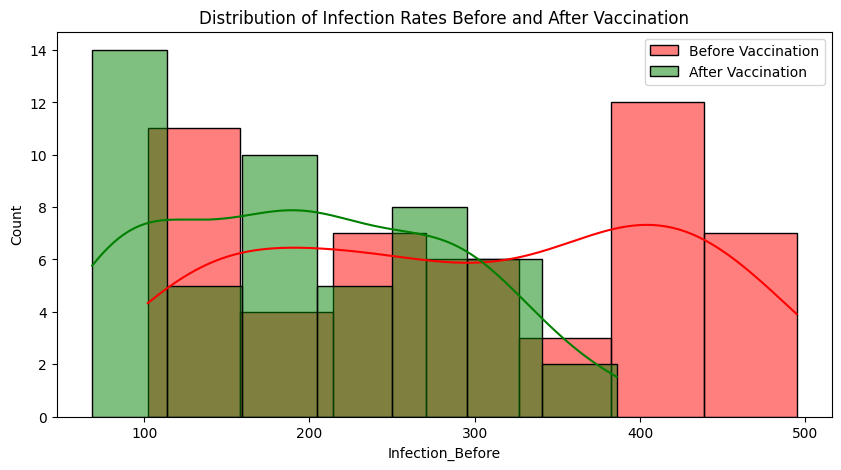

In [ ]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Basic statistics
print("\nDescriptive statistics:\n", data.describe())

# Visualizing infection rate distributions
plt.figure(figsize=(10, 5))
sns.histplot(data['Infection_Before'], label="Before Vaccination", color='red', kde=True)
sns.histplot(data['Infection_After'], label="After Vaccination", color='green', kde=True)
plt.legend()
plt.title("Distribution of Infection Rates Before and After Vaccination")
plt.show()


**Step 3: Perform Hypothesis Testing**

In [ ]:
# Paired T-test
t_stat, p_value = stats.ttest_rel(data['Infection_Before'], data['Infection_After'])

print(f"Paired T-test results:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Vaccination has significantly reduced infection rates.")
else:
    print("Fail to reject the null hypothesis: No significant effect detected.")


Paired T-test results:
T-statistic = 13.9858, P-value = 0.0000
Reject the null hypothesis: Vaccination has significantly reduced infection rates.


**Chi-Square Test**

In [ ]:
# Categorizing infection rates (Above median = High, Below median = Low)
data['High_Infection_Before'] = data['Infection_Before'] > data['Infection_Before'].median()
data['High_Infection_After'] = data['Infection_After'] > data['Infection_After'].median()

# Contingency table
contingency_table = pd.crosstab(data['High_Infection_Before'], data['High_Infection_After'])
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic = {chi2_stat:.4f}, P-value = {p_val:.4f}")

if p_val < alpha:
    print("Significant association between vaccination and infection reduction.")
else:
    print("No strong evidence of association.")



Chi-Square Test Results:
Chi2 Statistic = 32.0000, P-value = 0.0000
Significant association between vaccination and infection reduction.


**Step 4: Calculate Confidence Intervals**

In [ ]:
# Calculate mean and standard deviation of differences
diff = data['Infection_Before'] - data['Infection_After']
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)

# 95% Confidence Interval
ci_lower, ci_upper = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_diff/np.sqrt(len(diff)))

print(f"\n95% Confidence Interval for Reduction in Infection Rate: ({ci_lower:.2f}, {ci_upper:.2f})")



95% Confidence Interval for Reduction in Infection Rate: (86.98, 116.16)


**Step 5: Visualize Findings**

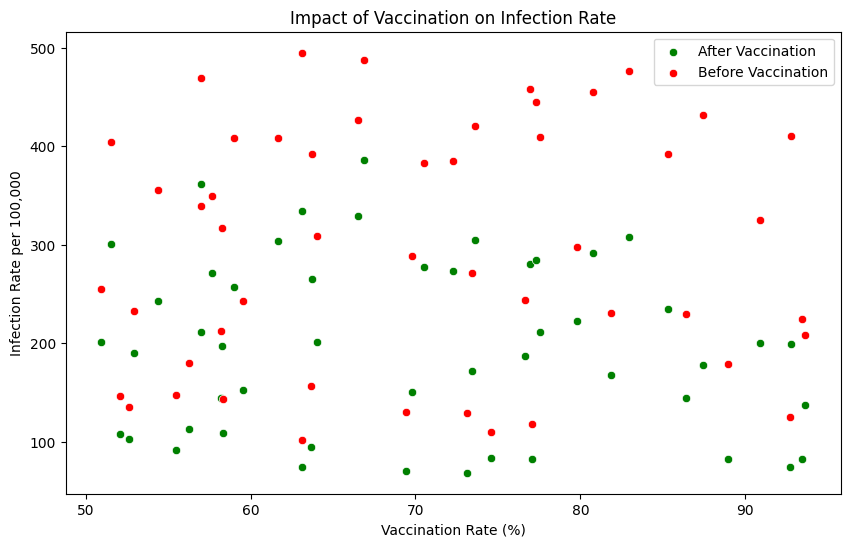

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Vaccination_Rate"], y=data["Infection_After"], color='green', label="After Vaccination")
sns.scatterplot(x=data["Vaccination_Rate"], y=data["Infection_Before"], color='red', label="Before Vaccination")
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Infection Rate per 100,000")
plt.title("Impact of Vaccination on Infection Rate")
plt.legend()
plt.show()


**Step 6: Interpret Results and Recommendations**

**Key Findings:**
*  Paired T-test results showed a statistically significant decrease in infection rates after vaccination.
*  Chi-square test confirmed a strong association between vaccination and infection reduction.
*   The 95% confidence interval suggests a clear reduction in infection rates after vaccination.
